In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import os
import sys

file_ = "workspace_table1.csv"
# file_name_2 = "credit_record.csv"
# path = "/home/jakubsobotka/Projekt"


In [102]:
df = pd.read_csv("workspace_table1.csv")
data = df.dropna()
df.head(4)

,Unnamed: 0,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,5008804,0,C,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,1,5008804,-1,C,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,2,5008804,-2,C,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,3,5008804,-3,C,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


In [92]:
def pp_1():
    pp_1 = df.groupby(["NAME_INCOME_TYPE","NAME_FAMILY_STATUS"]).agg({"ID":"nunique", "AMT_INCOME_TOTAL":"mean" }).reset_index().round(2)
    pp_n = pp_1.rename(columns={"NAME_INCOME_TYPE": "Rodzaj_zatrudnienia","NAME_FAMILY_STATUS":"status rodzinny","ID":"liczba klientów","AMT_INCOME_TOTAL":"średnia wartość zarobków"})
    return pp_n
def pp_2():
    pp_2 = df.groupby(["NAME_FAMILY_STATUS"]).agg({"AMT_INCOME_TOTAL":"mean","ID":"nunique"}).reset_index().round(2)
    pp_n = pp_2.rename(columns={"NAME_FAMILY_STATUS":"Status rodzinny","AMT_INCOME_TOTAL":"średnia wartość zarobków","ID": "liczba klientów"})
    x = pp_2["NAME_FAMILY_STATUS"]
    y = pp_2["ID"]
    plt.xlabel('Status klienta'), plt.ylabel('Średnia wartość zarobków'),plt.title("Liczba klientów - status klienta")
    plt.bar(x,y, color="red")
    return pp_n
def pp_3():    
    pp_3 = df.groupby(["STATUS"]).agg({"AMT_INCOME_TOTAL":"mean","ID":"nunique"}).reset_index().round(2)
    pp_n = pp_3.rename(columns={"STATUS":"Rodzaj opóźnienia","AMT_INCOME_TOTAL":"średnia wartość zarobków","ID": "liczba klientów"})
    x = pp_3["STATUS"]
    y = pp_3["ID"]
    plt.xlabel('Status zadłużenia'), plt.ylabel('Srednia wartość zarobków'),plt.title("Liczba klientow - status zadłużenia")
    plt.bar(x,y, color="red")
    return pp_n
def pp_4():
    pp_4 = df.groupby(["STATUS","CODE_GENDER"]).agg({"AMT_INCOME_TOTAL":"mean","ID":"nunique"}).reset_index().round(2)
    pp_n = pp_4.rename(columns={"STATUS":"Rodzaj opóźnienia","CODE_GENDER":"Płeć","AMT_INCOME_TOTAL":"średnia wartość zarobków","ID": "liczba klientów"})    
    pp_4 = df.groupby(["STATUS","CODE_GENDER"]).size().unstack().plot(kind="bar",title="Liczba klientów wg status opóźnienia i płci", stacked=True)
    plt.show()
    return pp_n

def pp_5():    
    pp_5 = df.groupby(["CODE_GENDER"]).agg({"AMT_INCOME_TOTAL":"mean","ID":"nunique"}).reset_index().round(2)
    pp_n = pp_5.rename(columns={"STATUS":"Rodzaj zadłuźenia","AMT_INCOME_TOTAL":"średnia wartość zarobków","CODE_GENDER": "Płeć","ID":"liczba klientów"})
    x = pp_5["CODE_GENDER"]
    y = pp_5["ID"]
    plt.xlabel('Płeć'), plt.ylabel('Liczba klientów'),plt.title("Płeć - liczba klientów")
    plt.bar(x,y, color="red")
    return pp_n


In [103]:
pp_1()

,Rodzaj_zatrudnienia,status rodzinny,liczba klientów,średnia wartość zarobków
0,Commercial associate,Civil marriage,857,204519.93
1,Commercial associate,Married,5665,220467.43
2,Commercial associate,Separated,487,233096.85
3,Commercial associate,Single / not married,1336,226087.48
4,Commercial associate,Widow,145,194449.91
5,Pensioner,Civil marriage,1,180000.00
6,Pensioner,Married,12,282326.09
7,Pensioner,Single / not married,4,260121.95
8,State servant,Civil marriage,231,174357.40
9,State servant,Married,2113,205523.79


,Status rodzinny,średnia wartość zarobków,liczba klientów
0,Civil marriage,183505.42,2575
1,Married,197080.96,21137
2,Separated,204024.50,1758
3,Single / not married,199928.84,4148
4,Widow,194845.41,704


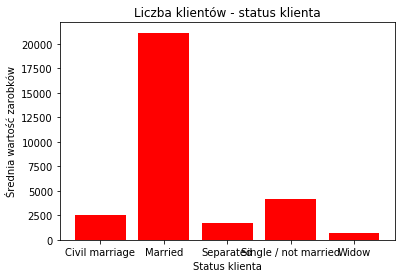

In [104]:
pp_2()

,Rodzaj opóźnienia,średnia wartość zarobków,liczba klientów
0,0,198679.84,26586
1,1,200262.55,3557
2,2,195605.09,450
3,3,204025.35,187
4,4,215623.73,147
5,5,211621.33,149
6,C,192710.40,14900
7,X,201177.15,16281


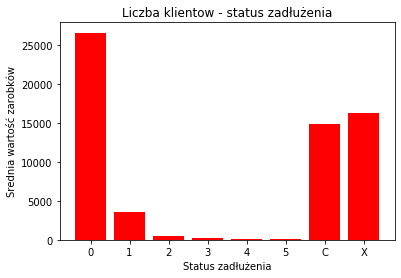

In [105]:
pp_3()

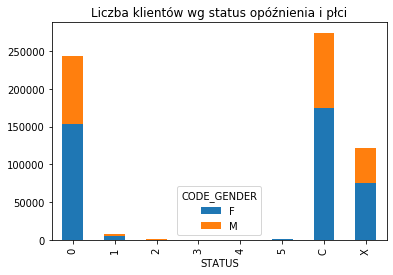

,Rodzaj opóźnienia,Płeć,średnia wartość zarobków,liczba klientów
0,0,F,182398.94,16865
1,0,M,226839.53,9721
2,1,F,183323.87,2172
3,1,M,226015.17,1385
4,2,F,179963.29,254
5,2,M,217457.60,196
6,3,F,197103.88,104
7,3,M,212302.58,83
8,4,F,196742.78,75
9,4,M,238516.88,72


In [106]:
pp_4()

,Płeć,średnia wartość zarobków,liczba klientów
0,F,181848.85,19195
1,M,221984.89,11127


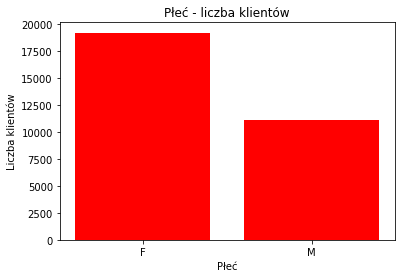

In [107]:
pp_5()